# Module 3 Assessment

Welcome to your Mod 3 Assessment. You will be tested for your understanding of concepts and ability to solve problems that have been covered in class and in the curriculum.

Use any libraries you want to solve the problems in the assessment.

You will have up to **two hours** to complete this assessment.

The sections of the assessment are:
- Combinatorics, Probability and Discrete Distributions
- Statistical Distributions
- Statistical Tests
- Bayesian Statistics



In [13]:
# import the necessary libraries
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import math
import pickle

## Part 1: Combinatorics, Probability & Discrete Distributions

### a. Set Theory

Given the following probabilities:

$P(A) = 0.7$

$P(B) = 0.5$

$P(B|A) = 0.4$

Find and assign to the variables in the next cell:

1. $P(A and B)$

2. $P(A or B)$

3. $P(A|B)$

4. $P(B|A^{c})$

Hint: draw a diagram!


In [9]:
ans1 = .7 * .4
ans2 = (.7 + .5) - .28
ans3 = .28/.5
ans4 = .28 - .4

### b. Card Combinatorics

You have a standard deck of 52 cards. We define three subsets:

1. What is the probability of drawing a king or a queen?
2. How many possible 5-card combinations can be formed with this deck of 52 cards?
3. Given that you've drawn 5 cards without replacement, what is the probability of getting **2 red cards** and **3 black cards**?


In [89]:
ans1 = 8/52
ans2 = round(combin(52,5),3)
ans3 =  47/52 * 42/47 * 37/42 * 32/37 * 27/32

### c. Discrete Probability Distributions

In a game with the same deck of 52 cards, you draw a card $n$ times with replacement. You win a point by drawing a face card (king, queen or jack). 

1. Let $k$ be the number of points won in the game. Write a function that takes in the number of draws, the probability of winning a point and $k$ to return the corresponding probability.

In [15]:
# def probability_of_scoring_k(n, p, k):
#     """
#     n = number of draws
#     p = probability of winning a point
#     k = number of points scored
    
#     Use np.factorial()
    
#     """
    
#     pass
# factorial
def factorial(n):
    prob = 1
    while n >= 1:
        prob = prob * n
        n = n - 1
    return prob

def perm(n,k):
    perm = math.factorial(n)/ math.factorial(n-k)
    return perm

def combin(n,k):
    combin = math.factorial(n)/(math.factorial(n-k) * math.factorial(k))
    return combin


def binomial(n,k,p):
    binomial = combin(n,k)*p**k*(1 - p)**(n-k)
    return binomial

2. Using your function, what is the probability of winning 8 points out of 22 draws?


In [20]:
# binomial(n,k,p)
ans2 = round(binomial(22,8,.36),3)
ans2

0.174

3. Plot the probability mass function of $k$ in 22 draws.


In [39]:
from scipy.stats import binom
import matplotlib.pyplot as plt

In [29]:
n, p = 22, 0.36
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')

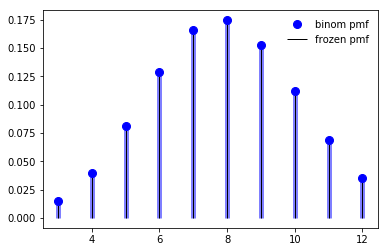

In [123]:
fig, ax = plt.subplots(1, 1)
x = np.arange(binom.ppf(0.01, n, p),
              binom.ppf(0.99, n, p))
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)
rv = binom(n, p)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1,
        label='frozen pmf')
ax.legend(loc='best', frameon=False)
plt.show()

4. Plot the cumulative density function of $k$ in 22 draws.

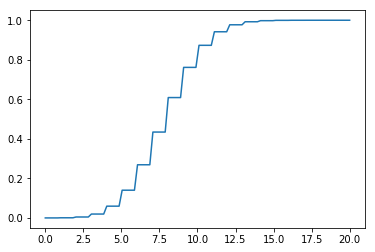

In [112]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,20,100)
cdf = stats.binom.cdf
plt.plot(x,cdf(x, n, p))
plt.show()

## Part 2: Statistical Distributions

### a. Descriptive Statistics

1. `ratings` is a list of ratings for a TexMex restaurant. Compute the descriptive statistics of `ratings`.

In [66]:
ratings = [1, 2, 7, 7.5, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 10, 10, 10]

mean = round(np.mean(ratings),3)
median = round(np.median(ratings),3)
mode = stats.mode(ratings)
standard_deviation = np.std(ratings)
number_range = minmax(ratings)
interquartile_range = stats.iqr(ratings, axis=None, rng=(25, 75), scale='raw', nan_policy='propagate', interpolation='linear', keepdims=False)

print(
"Mean: ", mean, "\n" 
"Median: ", median, "\n"
"Mode: ", mode, "\n"
"Standard Deviation: ", standard_deviation, "\n"
"Range: ", number_range, "\n"
"Interquartile Range: ", interquartile_range)

Mean:  7.694 
Median:  8.0 
Mode:  ModeResult(mode=array([8.]), count=array([8])) 
Standard Deviation:  2.351942984527715 
Range:  (1, 10) 
Interquartile Range:  1.0


In [67]:
# for range
# def minmax(val_list):
#     min_val = min(val_list)
#     max_val = max(val_list)

#     return (min_val, max_val)

2. What measure of centrality would you use to most fairly describe the ratings and why?

In [68]:
# Your written answer here
# I would use mean along with standard deviation 
# because it will average out the population as well as be normally distributed

### b. Continuous Distributions

Say we have data on all $10,000$ checks for this TexMex restaurant and they happen to be normally distributed with $\mu = 20$ and $\sigma = 2$. We can visualize the data as follows: 

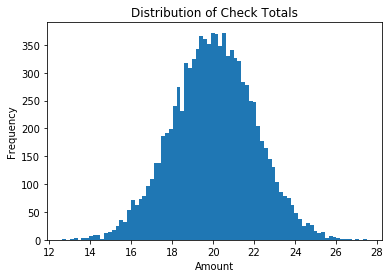

In [47]:
data = pickle.load(open("data/data10000.pkl", "rb"))
plt.title('Distribution of Check Totals')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.hist(data, bins=80)
plt.show()

For the following questions, you may use a [z-table](https://www.math.arizona.edu/~rsims/ma464/standardnormaltable.pdf).

1. Write a function to compute z-scores of single checks.


In [97]:
# def z_score(check_amt):
    
#     """
#     check_amt = the amount for which we want to compute the z-score
    
#     """
    
#     pass

# # Calculating Z score
# mean = df.mean()
# sd = df.std()
# mean,sd


# # Calculate z
# z = (x - mean)/sd
# z
# X = mean + z_score*sd
# X

def z_score(x,mu,sigma):
    z = (x - mu)/sigma
    return z

2. Using $\alpha = 0.05$, is my 23 dollar check significantly **greater** than the mean? Assign boolean `True` for yes, `False` for no to `ans2`.
3. What if my check comes up to 24 dollars?

In [146]:
twentythree = z_score(23,20,2)
twentyfour = z_score(24,20,2)

In [149]:
#Say we have data on all  10,000  checks for this TexMex restaurant 
# they happen to be normally distributed with  𝜇=20  and  𝜎=2
ans2 = twentythree > 1.96
ans3 = twentyfour > 1.96

True

4. Define **confidence interval** and determine the 95% confidence interval for this population.

In [ ]:
# Your written answer here
# The 95% confidence interval defines a range of values that 
# you can be 95% certain contains the population mean. With large samples, 
# you know that mean with much more precision than you do with a small sample, 
# so the confidence interval is quite narrow when computed from a large sample.
# alpha .05 would be 95%

5. Say we don't know how our population of checks is distributed. How does **sampling** and the **Central Limit Theorem** allow us to **make inferences on the population mean**, i.e. estimate $\mu, \sigma$ of the population mean?

In [ ]:
# Your written answer here
# sampling and the central limit theorem allows the z-statistics to be true
# being that is gaining the mean of a mean of the population to become more normalized

## Part 3: Statistical Testing

### a. Hypotheses and Errors

This TexMex restaurant recently introduced Queso to its menu. The restaurant owners want to know if customers ordering Queso end up spending **more or less**. Let the average amount on Queso customers' checks be $X_{Q}$.

1. Set up the null and alternative hypotheses for this test.

$H_{0}:$ `price of ques goes up` 'u ≤ price'

$H_{A}:$ `price of spending goes down` 'u = price'

2. In this context, what does it mean to make `Type I` and `Type II` errors?

In [ ]:
# Your written answer here
# Type I when you reject the true null hypothesis(false positive)
# Type II when you accept a false null hypothesis

### b. Sample Testing

Now assume we don't have reliable data on the population. With $\alpha = 0.05$, we want to determine if Queso checks are significantly more **or** less than normal. We have random samples of Queso and Non-Queso checks. The samples are in the graphs below and you may assume they have equal variances.

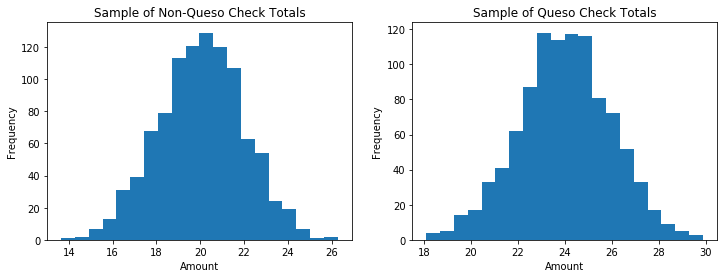

In [99]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

np.random.seed(43)
no_queso = np.random.choice(data, 1000)
ax1.set_title('Sample of Non-Queso Check Totals')
ax1.set_xlabel('Amount')
ax1.set_ylabel('Frequency')
ax1.hist(no_queso, bins=20)

queso = pickle.load(open("data/queso.pkl", "rb"))
ax2.set_title('Sample of Queso Check Totals')
ax2.set_xlabel('Amount')
ax2.set_ylabel('Frequency')
ax2.hist(queso, bins=20)
plt.show()

1. Run a `statistical test` on the two samples to determine whether you should reject your null hypothesis.

In [121]:
n_1 = len(queso)

In [124]:
n_2 = len(no_queso)

In [116]:
variance_1 = queso.std()

In [115]:
variance_2 = no_queso.std()

In [119]:
x_bar_1 = queso.mean()

In [120]:
x_bar_2 = no_queso.mean()

In [125]:
nom =  (x_bar_1 - x_bar_2)

In [126]:
denom = math.sqrt((variance_1**2/n_1) + (variance_2**2/n_2))

In [135]:
z_test = nom/denom
z_test

45.19117872755062

In [136]:
stats.ttest_ind(no_queso, queso)

Ttest_indResult(statistic=-45.16857748646329, pvalue=1.29670967092511e-307)

2. What are the conditions required to perform the test you chose?

In [ ]:
# Your written answer here
# that there are two samples with the same variance as well as more than 100 population 
# we reject the null value (z= 45.1, p < 0.05)

## Part 4: Bayesian Statistics
### a. Bayes' Theorem

Thomas wants to get a new puppy 🐕 🐶 🐩 


<img src="https://media.giphy.com/media/rD8R00QOKwfxC/giphy.gif" />

He can choose to get his new puppy either from the pet store or the pound. The probability of him going to the pet store is $0.2$. 

He can choose to get either a big, medium or small puppy.

If he goes to the pet store, the probability of him getting a small puppy is $0.6$. The probability of him getting a medium puppy is $0.3$, and the probability of him getting a large puppy is $0.1$.

If he goes to the pound, the probability of him getting a small puppy is $0.1$. The probability of him getting a medium puppy is $0.35$, and the probability of him getting a large puppy is $0.55$.

1. What is the probability of Thomas getting a small puppy?
2. Given that he got a large puppy, what is the probability that Thomas went to the pet store?
3. Given that Thomas got a small puppy, is it more likely that he went to the pet store or to the pound?
4. For question 2, what is the prior, posterior and likelihood?

In [141]:
ans1 = (.6*.2)+(.8*.1)
ans2 = .44/.55
ans3 = "the pet store"
ans4_prior = "P(large puppy | pet store) "
ans4_posterior = "P(petstore|large pupp) = P(large puppy | pet store)*P(pet store)/P(large puppy)"
ans4_likelihood = "P(pet store)"